# 高頻度取引の実態

このようなイメージ図では疑問を抱く人もいるので、もう少し正確な情報を見てみましょう。米国にはVirtという高頻度取引のマーケットメイクと自己勘定取引を行う会社があります。この会社が取引上間の価格の差を高速通信網を介して裁定取引をするさきがけの企業です。この企業は株式市場に上場しているので株価で収益の動向を推察できます。つぎの図の青が配当込み、橙が価格の推移です。平均の配当率はこの期間で4.76％です。株価を見ると決して安定しているとはいえません。配当はそれなりに安定しているようですが、2016年から2017年に掛けては存続が危ういのではといううわさが流れました。それは高速取引の競争が激化し、そのシステムを維持する費用がバカにならないからです。また、HFT業界としても収益も底で安定になりました。

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt #描画ライブラリ
import pandas as pd
import numpy as np
import yfinance as yf

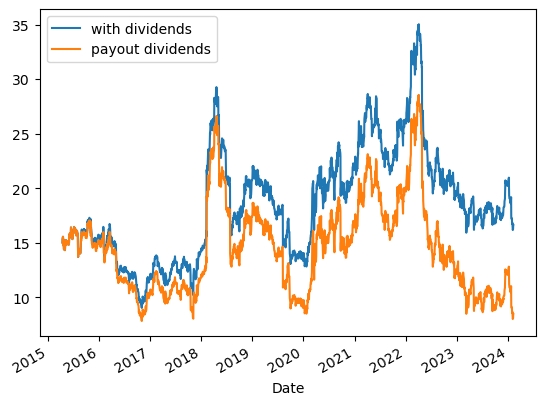

In [3]:
dividends=yf.Ticker('virt').history(period="16y").Dividends.cumsum()
close=yf.Ticker('virt').history(period="16y").Close
close0=close-dividends
close.plot(label='with dividends')
close0.plot(label='payout dividends')
plt.legend()

## 銘柄選択

銘柄選択をビジネスの成功だとか、財務データのバランスだとか？技術力とか、消費者の嗜好だとかというファンダメンタルな情報を基に行うべきたというもっともな理屈はいくらでもあります。また、どうように定量分析で行うべきという無限の理由があります。ここでは最も基本的な定量分析である過去のリターンを基に考えてみます。ここではNASDAQ100, Dow Johns Industrial Average, S&P 500, IBBをベースに考えます。用いる情報は

投資期間:period
リターン(年率換算):r
ボラティリティ(年率換算):v
投資期間２:period2
リターン(年率換算):r2
ボラティリティ(年率換算):v2

これらのデータを基にrを大きい順に並べて必要なデータ数分の銘柄を出力します。




In [ ]:
def AssetSelection(filename,period,period2,output):
    PORT=pd.read_csv(filename,header=None,names=['ticker'])
    cols=[]
    for x in PORT.iloc[:,0]:
        ticker = yf.Ticker(x)
        tsd = np.log(ticker.history(period=period).Close)
        tsd2 = np.log(ticker.history(period=period2).Close)
        r=(np.exp(tsd.iloc[-1]-tsd.iloc[0])+1)**(252/len(tsd))
        r2=(np.exp(tsd2.iloc[-1]-tsd2.iloc[0])+1)**(252/len(tsd2))
        cols.append([r,tsd.diff().std()*np.sqrt(252),len(tsd),r2,tsd2.diff().std()*np.sqrt(252),len(tsd2)])
    PERF=pd.DataFrame(cols,index=PORT.iloc[:,0],columns=['r','v','n','r2','v2','n2'])
    print(PERF.sort_values(['n','r'], ascending=False).head(output))

In [134]:
AssetSelection('nasdaq.csv','20y','5y',30)

               r         v     n        r2        v2    n2
ticker                                                    
AAPL    1.370691  0.329366  5035  1.413318  0.317112  1259
MNST    1.367893  0.428011  5035  1.239167  0.271879  1259
NVDA    1.350311  0.492638  5035  1.836774  0.508150  1259
ISRG    1.299234  0.405344  5035  1.262125  0.356442  1259
BKNG    1.295576  0.386875  5035  1.247202  0.370025  1259
NFLX    1.264625  0.537543  5035  1.212957  0.473210  1259
ODFL    1.262303  0.368647  5035  1.418525  0.339794  1259
AMZN    1.243275  0.382290  5035  1.261592  0.350652  1259
ASML    1.237068  0.363680  5035  1.459792  0.404799  1259
REGN    1.232999  0.452530  5035  1.272546  0.314885  1259
ORLY    1.220787  0.278817  5035  1.306152  0.281252  1259
CPRT    1.213219  0.282755  5035  1.374620  0.303009  1259
IDXX    1.209721  0.295445  5035  1.304186  0.344601  1259
VRTX    1.206544  0.448078  5035  1.272225  0.322521  1259
LRCX    1.202497  0.408298  5035  1.457780  0.472188  12

In [135]:
AssetSelection('djia.csv','20y','5y',30)

               r         v     n        r2        v2    n2
ticker                                                    
AAPL    1.370691  0.329366  5035  1.413318  0.317112  1259
MSFT    1.176855  0.269997  5035  1.391377  0.303123  1259
UNH     1.168281  0.304781  5035  1.259905  0.296220  1259
MCD     1.160527  0.201010  5035  1.234503  0.231011  1259
HD      1.152744  0.260185  5035  1.265720  0.288824  1259
NKE     1.147491  0.281089  5035  1.182873  0.330801  1259
CAT     1.144330  0.315099  5035  1.304497  0.323020  1259
HON     1.122192  0.252659  5035  1.196824  0.270939  1259
TRV     1.117078  0.270790  5035  1.239297  0.289884  1259
JPM     1.114082  0.359470  5035  1.247196  0.317909  1259
CVX     1.112024  0.284149  5035  1.211626  0.357764  1259
BA      1.109274  0.346538  5035  1.088893  0.508067  1259
AMGN    1.103731  0.256203  5035  1.231112  0.252502  1259
AXP     1.103666  0.348916  5035  1.259213  0.374758  1259
MRK     1.099312  0.253736  5035  1.245724  0.230707  12

In [136]:
AssetSelection('sp500.csv','20y','5y',30)

               r         v     n        r2        v2    n2
ticker                                                    
AAPL    1.370691  0.329366  5035  1.413318  0.317112  1259
MNST    1.367893  0.428011  5035  1.239167  0.271879  1259
NVDA    1.350311  0.492638  5035  1.836774  0.508150  1259
ISRG    1.299234  0.405344  5035  1.262125  0.356442  1259
BKNG    1.295576  0.386875  5035  1.247202  0.370025  1259
NFLX    1.264625  0.537543  5035  1.212957  0.473210  1259
ODFL    1.262303  0.368647  5035  1.418525  0.339794  1259
AMZN    1.243275  0.382290  5035  1.261592  0.350652  1259
REGN    1.232999  0.452530  5035  1.272546  0.314885  1259
WST     1.221796  0.287782  5035  1.380702  0.325017  1259
SBAC    1.221293  0.345236  5035  1.174230  0.306700  1259
ORLY    1.220787  0.278817  5035  1.306152  0.281252  1259
CPRT    1.213219  0.282755  5035  1.374620  0.303009  1259
TYL     1.213057  0.310535  5035  1.256166  0.314301  1259
IDXX    1.209721  0.295445  5035  1.304186  0.344601  12

In [137]:
AssetSelection('IBB.csv','20y','5y',30)

               r         v     n        r2        v2    n2
ticker                                                    
RGEN    1.234541  0.519758  5035  1.349680  0.487573  1259
REGN    1.232999  0.452530  5035  1.272546  0.314885  1259
VRTX    1.206544  0.448078  5035  1.272225  0.322521  1259
ILMN    1.199928  0.462787  5035  1.082321  0.439982  1259
MTD     1.181687  0.276500  5035  1.226468  0.314289  1259
UTHR    1.161763  0.371651  5035  1.229488  0.329226  1259
GILD    1.144458  0.293205  5035  1.184812  0.258037  1259
BRKR    1.136427  0.445037  5035  1.247091  0.366730  1259
BMRN    1.132381  0.419928  5035  1.143578  0.391004  1259
WAT     1.119189  0.291790  5035  1.190465  0.310658  1259
TECH    1.116674  0.267654  5035  1.202655  0.342312  1259
AMGN    1.103731  0.256203  5035  1.231112  0.252502  1259
INCY    1.103339  0.517190  5035  1.114514  0.313155  1259
IONS    1.102385  0.531072  5035  1.133439  0.426078  1259
CRL     1.099862  0.316980  5035  1.225564  0.383778  12

In [138]:
AssetSelection('nasdaq.csv','5y','1y',30)

               r         v     n        r2        v2   n2
ticker                                                   
NVDA    1.836774  0.508150  1259  4.419591  0.444882  251
TSLA    1.594300  0.645877  1259  1.988555  0.494848  251
AMD     1.535169  0.522295  1259  3.130987  0.455172  251
KLAC    1.502939  0.440898  1259  2.667173  0.336706  251
CDNS    1.481914  0.356355  1259  2.707854  0.274513  251
SNPS    1.468498  0.345659  1259  2.611948  0.282867  251
ASML    1.459792  0.404799  1259  2.469403  0.310102  251
LRCX    1.457780  0.472188  1259  2.838843  0.347185  251
AVGO    1.454229  0.367738  1259  3.227616  0.320624  251
ZS      1.442961  0.596254  1259  2.916673  0.485186  251
PANW    1.433800  0.394752  1259  3.296353  0.381387  251
MDB     1.433510  0.670607  1259  3.393730  0.548506  251
MELI    1.429754  0.550197  1259  2.586513  0.373412  251
AMAT    1.428082  0.455010  1259  2.644432  0.327598  251
MRNA    1.422220  0.736655  1259  1.518881  0.476495  251
TTD     1.4211

In [139]:
AssetSelection('sp500.csv','5y','1y',30)

               r         v     n        r2        v2   n2
ticker                                                   
NVDA    1.836774  0.508150  1259  4.419591  0.444882  251
ENPH    1.759872  0.768079  1259  1.580365  0.641770  251
BLDR    1.724111  0.525472  1259  3.323195  0.422878  251
TSLA    1.594300  0.645877  1259  1.988555  0.494848  251
AMD     1.535169  0.522295  1259  3.130987  0.455172  251
LLY     1.508497  0.306376  1259  3.180367  0.284814  251
KLAC    1.502939  0.440898  1259  2.667173  0.336706  251
PWR     1.483155  0.354018  1259  2.399080  0.278136  251
CDNS    1.481914  0.356355  1259  2.707854  0.274513  251
MPWR    1.476026  0.503336  1259  2.550422  0.466838  251
SNPS    1.468498  0.345659  1259  2.611948  0.282867  251
FICO    1.459633  0.407832  1259  2.960274  0.264163  251
LRCX    1.457780  0.472188  1259  2.838843  0.347185  251
AVGO    1.454229  0.367737  1259  3.227616  0.320624  251
JBL     1.443388  0.395540  1259  2.707442  0.355438  251
AXON    1.4361

In [141]:
AssetSelection('IBB.csv','5y','1y',30)

               r         v     n        r2        v2   n2
ticker                                                   
AXSM    1.630053  0.844988  1259  2.577514  0.442907  250
CYTK    1.628735  0.743139  1259  2.776226  0.843941  250
USD     1.589897  0.733029  1259  4.282316  0.582665  250
ARCT    1.549894  1.099308  1259  3.117623  0.732813  250
XENE    1.488127  0.639577  1259  2.256836  0.413439  250
FLGT    1.487649  0.854008  1259  1.770414  0.429162  250
ITCI    1.456570  0.775119  1259  2.509136  0.368476  250
IMGN    1.449705  0.937417  1259  8.317991  1.196701  250
MEDP    1.441100  0.477689  1259  2.443483  0.373609  250
ALPN    1.434194  0.841777  1259  4.753097  0.710166  250
KRYS    1.431398  0.730776  1259  2.448705  0.508033  250
APLS    1.431237  0.739825  1259  2.336431  0.910339  250
MRNA    1.422220  0.736655  1259  1.514722  0.477196  250
NTRA    1.410843  0.685077  1259  2.653731  0.505429  250
ARGX    1.362125  0.447594  1259  2.084387  0.483419  250
SNDX    1.3607